In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving EOD-HD.csv to EOD-HD.csv
User uploaded file "EOD-HD.csv" with length 1290240 bytes


In [0]:
import pandas as pd

df=pd.read_csv('EOD-HD.csv',index_col='Date',parse_dates=True)



In [90]:
print(df.head(4))

              Open    High       Low   Close     Volume  Dividend  Split  \
Date                                                                       
2018-08-24  200.35  202.50  200.0000  201.30  3053678.0       0.0    1.0   
2018-08-23  199.39  201.41  199.1400  200.16  3595033.0       0.0    1.0   
2018-08-22  200.80  203.55  198.6505  198.97  5006301.0       0.0    1.0   
2018-08-21  198.83  200.74  198.4100  200.23  4121878.0       0.0    1.0   

            Adj_Open  Adj_High   Adj_Low  Adj_Close  Adj_Volume  
Date                                                             
2018-08-24    200.35    202.50  200.0000     201.30   3053678.0  
2018-08-23    199.39    201.41  199.1400     200.16   3595033.0  
2018-08-22    200.80    203.55  198.6505     198.97   5006301.0  
2018-08-21    198.83    200.74  198.4100     200.23   4121878.0  


In [0]:
df = df[['PCT_change',  'HCL_PCT',  'Adj_Close', 'Adj_Volume']]

In [7]:
df.head()


,PCT_change,HCL_PCT,Adj_Close,Adj_Volume
0,0.474170,1.250000,201.30,3053678.0
1,0.386178,1.139902,200.16,3595033.0
2,-0.911355,2.466392,198.97,5006301.0
3,0.704119,1.174336,200.23,4121878.0
4,1.067198,1.555783,197.93,2955884.0


In [0]:
df['HCL_PCT']=((df['Adj_High']-df['Adj_Low'])/df['Adj_Low'])*100
df['PCT_change']=((df['Adj_Close']-df['Adj_Open'])/df['Adj_Open'])*100

In [8]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression



/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [98]:

forecast_col='Adj_Close'
forecast_out=int(math.ceil(0.01*len(df)))
forecast_out
df.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [99]:
df['label']=df[forecast_col].shift(-forecast_out)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PCT_change,HCL_PCT,Adj_Close,Adj_Volume,label
Date,,,,,
2018-08-24,0.474170,1.250000,201.30,3053678.0,172.410814
2018-08-23,0.386178,1.139902,200.16,3595033.0,171.913552
2018-08-22,-0.911355,2.466392,198.97,5006301.0,172.540103
2018-08-21,0.704119,1.174336,200.23,4121878.0,171.565468
2018-08-20,1.067198,1.555783,197.93,2955884.0,173.494846


In [0]:

df.columns = df.columns.str.strip()
df = df.fillna(method='ffill')
x=np.array(df.drop(['label'],1))
y=np.array(df['label'])





In [0]:

y=np.array(df['label'])


In [0]:
x_train,x_test,y_train,y_test=cross_validation.train_test_split(x,y,test_size=0.2)


In [59]:
clf=LinearRegression(n_jobs=-1)
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
confidence=clf.score(x_test,y_test)


In [0]:
x = np.array(df.drop(['label'], 1))

x_lately=x[-forecast_out:]
y=np.array(df['label'])
df.dropna(inplace=True)
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.2)

In [103]:
forecast_set = clf.predict(x_lately)
print(forecast_set, confidence, forecast_out)


[4.57649807e+06 2.66873410e+06 4.42489521e+06 1.55466217e+07
 2.57549137e+07 1.69634065e+06 1.55629900e+06 1.95418826e+06
 4.68301258e+05 1.97874983e+05 3.27381073e+05 1.46264462e+06
 1.08802814e+06 1.51486926e+05 2.16461153e+06 4.68301258e+05
 2.66873410e+06 7.59799710e+05 9.94374016e+05 3.50501934e+05
 3.27381073e+05 7.95651678e+05 1.32172444e+06 1.13441619e+06
 1.49849659e+06 3.62068198e+05 7.36684682e+05 1.17027400e+06
 7.13420460e+05 2.22358461e+06 1.26392812e+06 1.69634092e+06
 2.63288797e+06 3.27381073e+05 8.53453831e+05 5.26103411e+05
 7.59799443e+05 1.28365798e+05 4.68300991e+05 1.74753855e+05
 1.16805367e+05 2.10459488e+05 2.45140780e+05 1.16805367e+05
 8.10997337e+04 2.33726684e+05 1.97874716e+05 3.47116768e+04
 1.05664737e+04 5.26103143e+05 2.33726684e+05 2.33726684e+05
 1.74761845e+05 3.85194947e+05 2.91528837e+05 9.36571596e+05
 1.05744643e+04 1.74765844e+05 3.50501666e+05 3.50501666e+05
 2.45140780e+05 4.78837079e+05 8.10997337e+04 7.01997290e+05
 8.53453564e+05 1.168053

In [104]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]


df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9854650355374199


In [0]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time

In [0]:
style.use('ggplot')

In [0]:
df['Forecast']=np.nan


In [0]:

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [0]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

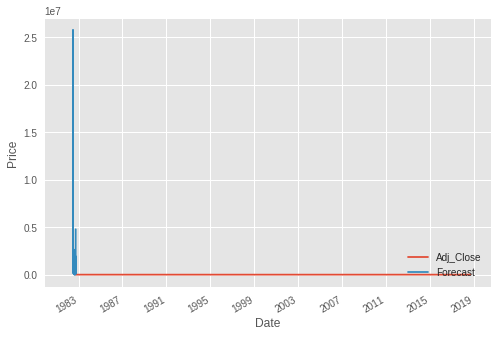

In [129]:
df['Adj_Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()